![jupyter](./images/diabetesRegression_frame.png)

In [1]:
import torch
import numpy as np

# 数据
# delimiter分割符
xy =np.loadtxt('D:/code/datasets/diabetes.csv.gz',delimiter=',',dtype=np.float32)
# xy[:,:-1]选择所有行，除-1列(最后一列)的所有列
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])

In [2]:
# 模型

class diabetes_model(torch.nn.Module):
    def __init__(self):
        super(diabetes_model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = diabetes_model()

In [3]:
# 损失函数和优化器
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [4]:
# 训练
loss_list = []
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    print(epoch,loss.item())
    loss_list.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


0 0.6854512691497803
1 0.6850405931472778
2 0.6846341490745544
3 0.6842319369316101
4 0.6838338971138
5 0.6834399104118347
6 0.6830499768257141
7 0.682664155960083
8 0.6822823286056519
9 0.6819043755531311
10 0.6815304756164551
11 0.6811603307723999
12 0.6807939410209656
13 0.6804313659667969
14 0.6800726056098938
15 0.6797176003456116
16 0.6793662309646606
17 0.6790184378623962
18 0.6786742806434631
19 0.6783336400985718
20 0.6779965162277222
21 0.6776629686355591
22 0.6773327589035034
23 0.6770059466362
24 0.6766826510429382
25 0.6763625741004944
26 0.6760458946228027
27 0.6757323741912842
28 0.6754221320152283
29 0.6751151084899902
30 0.6748113632202148
31 0.6745105981826782
32 0.6742130517959595
33 0.6739184856414795
34 0.6736270189285278
35 0.6733384728431702
36 0.6730530261993408
37 0.6727704405784607
38 0.6724908351898193
39 0.6722140908241272
40 0.6719401478767395
41 0.671669065952301
42 0.6714008450508118
43 0.6711353063583374
44 0.6708725690841675
45 0.6706124544143677
46 0.6

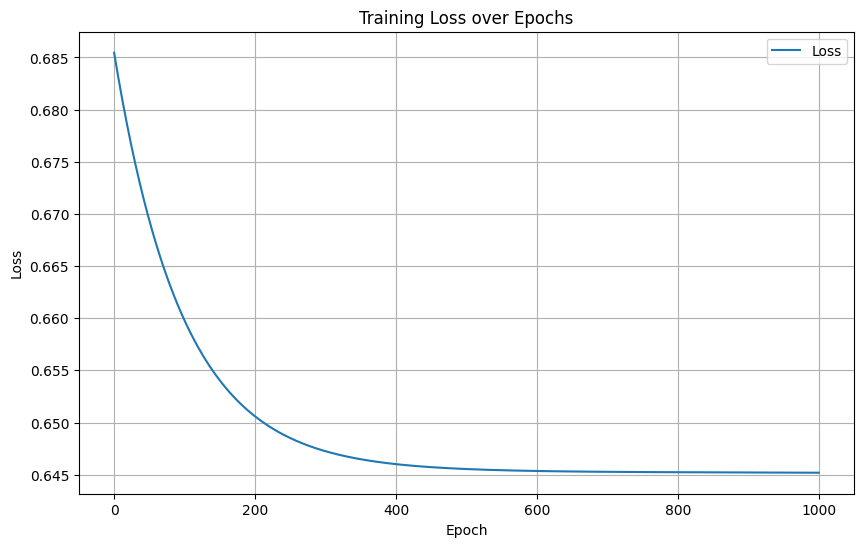

In [5]:
import matplotlib.pyplot as plt

# 假设 loss_list 是在训练过程中记录的损失值列表

# 绘制损失变化图
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_list)), loss_list, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid()
plt.show()

